In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from funciones import *

# Second bivariate figures

## "Controlled" signals

In [18]:

muE = muI = 10**-2
nEE = 1.5   #0.96
nEI = 1.5     #0.24
nIE = -0.5    #-0.3
nII = 0. #0./10
K = 10**5
titles = ['Poisson $\mu=1$', '$\mu=10^{-2}$', '$\mu=10^2$']

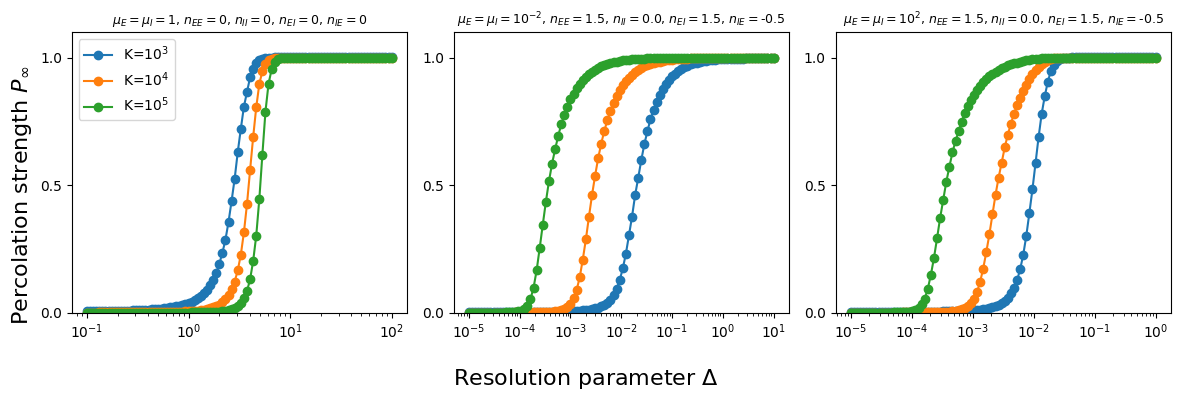

In [4]:
mus1 = [1, 10**-2, 10**2]
mus2 = [1, 10**-2, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-5, 0, 100)]
np.save(f'./data/deltas_bivariate_stationary mu-2', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean # susceptibility
        
        np.save(f'./data/percolation mean bivariate stationary plot {i} K={K} mu-2', percolation_mean)
        np.save(f'./data/percolation sus bivariate stationary plot {i} K={K} mu-2', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=\mu_I=1$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 9)
fig.axes[1].set_title(f'$\mu_E=\mu_I=10^{ {int(np.log10(mus1[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 9)
fig.axes[2].set_title(f'$\mu_E=\mu_I=10^{ {int(np.log10(mus1[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 9)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


In [19]:
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-5, 0, 100)]
percolation_mean_0 = [np.load(f'./data/percolation mean bivariate stationary plot 0 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_mean_1 = [np.load(f'./data/percolation mean bivariate stationary plot 1 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_mean_2 = [np.load(f'./data/percolation mean bivariate stationary plot 2 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]

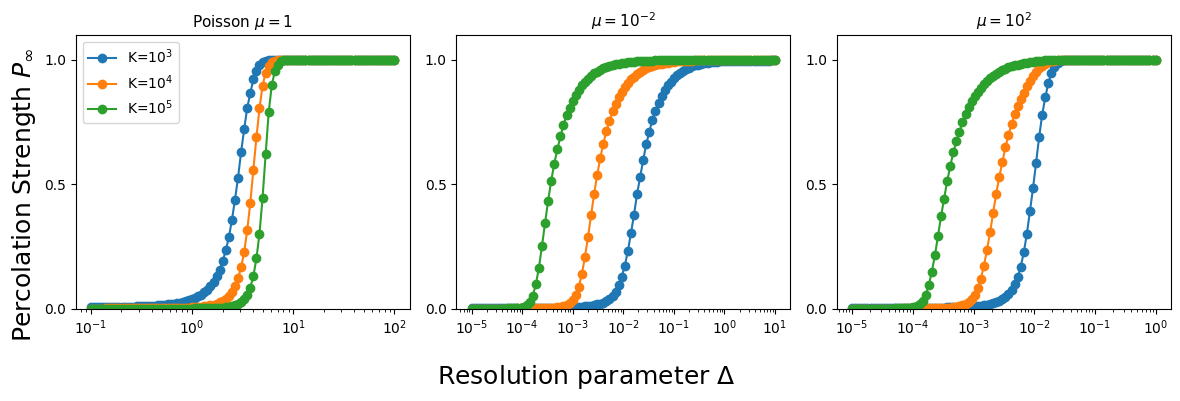

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_mean_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_mean_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_mean_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)

fig.supylabel('Percolation Strength $P_{\infty}$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

In [21]:
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-5, 0, 100)]
percolation_sus_0 = [np.load(f'./data/percolation sus bivariate stationary plot 0 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_1 = [np.load(f'./data/percolation sus bivariate stationary plot 1 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_2 = [np.load(f'./data/percolation sus bivariate stationary plot 2 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]

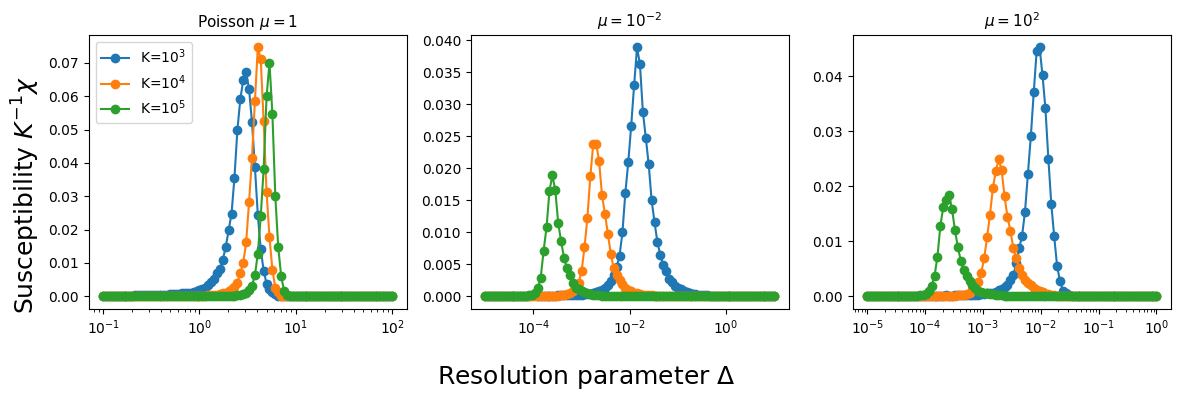

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_sus_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_sus_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_sus_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)

fig.supylabel('Susceptibility $K^{-1}\chi$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

## Stats stationary

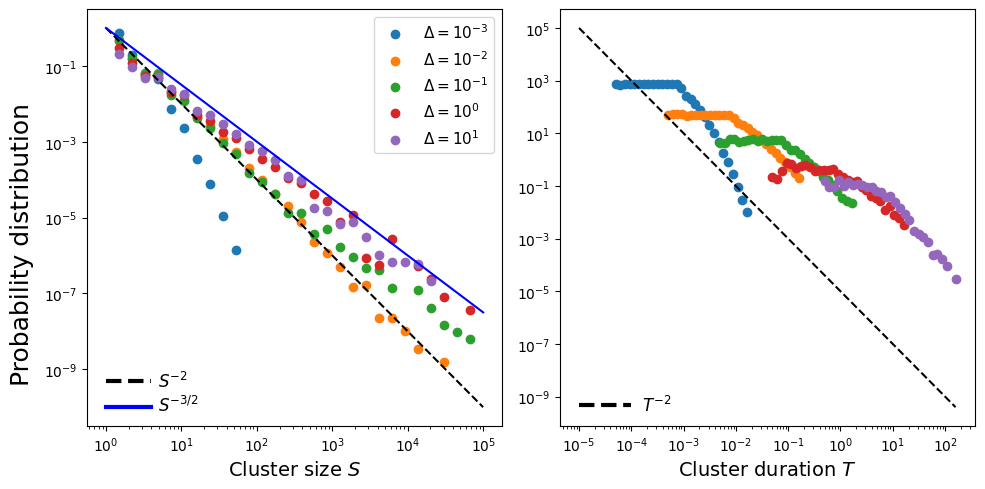

In [30]:
R = 10**3
K = 10**5
deltas = np.logspace(-3, 1, num = 5) 
s_bins = np.logspace(0, 5, num = 30, base = 10)
np.save(f'./data/Bivariate stationary sbins', s_bins)
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])
tbins = []

for delta in deltas:
    t_bins = np.logspace(np.log10(0.05*delta), np.log10(20*delta), num = 30, base = 10)
    tbins.append(t_bins)
    all_cluster_sizes = []
    all_cluster_times = []
    for _ in range(R):
        _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, 10**-2, 10**-2)
        _, cluster_sizes, cluster_times = identify_clusters(times, delta)
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)
    np.save(f'./data/Sizes bivariate stationary Delta = {delta} mu-2', all_cluster_sizes)
    np.save(f'./data/Times bivariate stationary Delta = {delta} mu-2', all_cluster_times)
    s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
    ax0.scatter(s_bins[:-1], s_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')
    t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
    ax1.scatter(t_bins[:-1], t_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')

np.save(f'./data/Bivariate stationary tbins mu-2', tbins)

ax0.legend(fontsize = 11)

y_s = s_bins**(-2)
t_aux = np.logspace(-5, 2.2, num = 50)
y_t = t_aux**(-2)*10**-5
y_s2 = s_bins**(-3/2)

ax0.plot(s_bins, y_s, linestyle= '--', color = 'black', label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$', color = 'blue')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$', fontsize=14)

fig.supylabel('Probability distribution', fontsize=18)

ax1.plot(t_aux, y_t, label='$T^{-2}$', color = 'black', linestyle= '--')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$', fontsize=14)

fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.axes[1].annotate('$T^{-2}$', xy=(0.000085, 0.85E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[1].plot(np.logspace(-5, -4, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.tight_layout()

## "Critical" signal 

In [28]:
muE = muI = 10**-2
nEE = 1.5   #0.96
nEI = 1.5     #0.24
nIE = -0.33    #-0.3
nII = 0. #0./10
K = 10**5

## Phase diagram

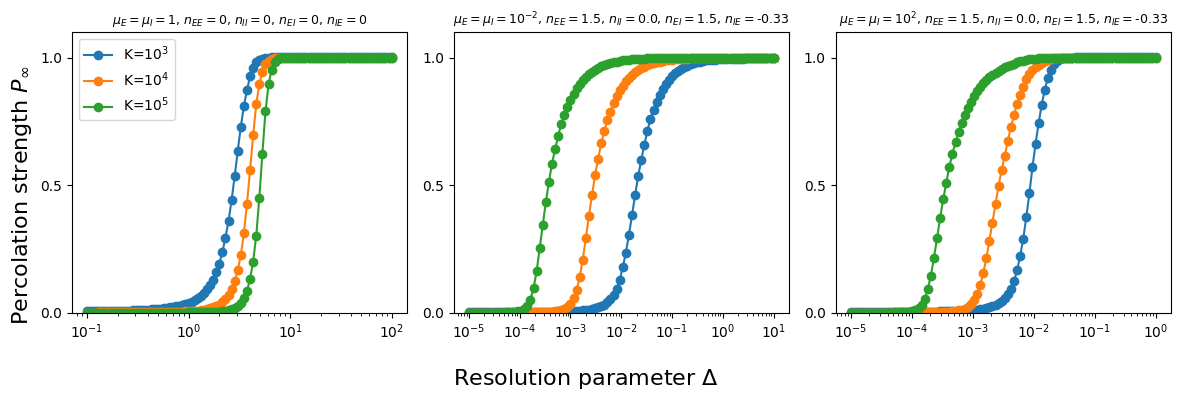

In [9]:
mus1 = [1, 10**-2, 10**2]
mus2 = [1, 10**-2, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-5, 0, 100)]
np.save(f'./data/deltas_bivariate_critical mu-2', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation mean bivariate critical plot {i} K={K} mu-2', percolation_mean)
        np.save(f'./data/percolation sus bivariate critical plot {i} K={K} mu-2', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=\mu_I=1$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 9)
fig.axes[1].set_title(f'$\mu_E=\mu_I=10^{ {int(np.log10(mus1[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 9)
fig.axes[2].set_title(f'$\mu_E=\mu_I=10^{ {int(np.log10(mus1[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 9)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


In [23]:
percolation_mean_0 = [np.load(f'./data/percolation mean bivariate critical plot 0 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_mean_1 = [np.load(f'./data/percolation mean bivariate critical plot 1 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_mena_2 = [np.load(f'./data/percolation mean bivariate critical plot 2 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]

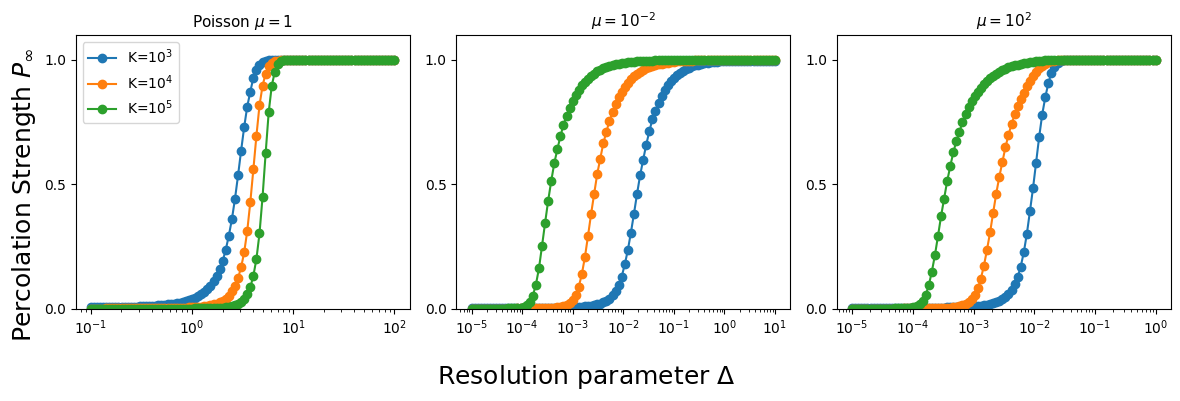

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_mean_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_mean_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_mean_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)

fig.supylabel('Percolation Strength $P_{\infty}$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

## $\chi$

In [25]:
percolation_sus_0 = [np.load(f'./data/percolation sus bivariate critical plot 0 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_1 = [np.load(f'./data/percolation sus bivariate critical plot 1 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_2 = [np.load(f'./data/percolation sus bivariate critical plot 2 K={K} mu-2.npy') for K in [10**3, 10**4, 10**5]]

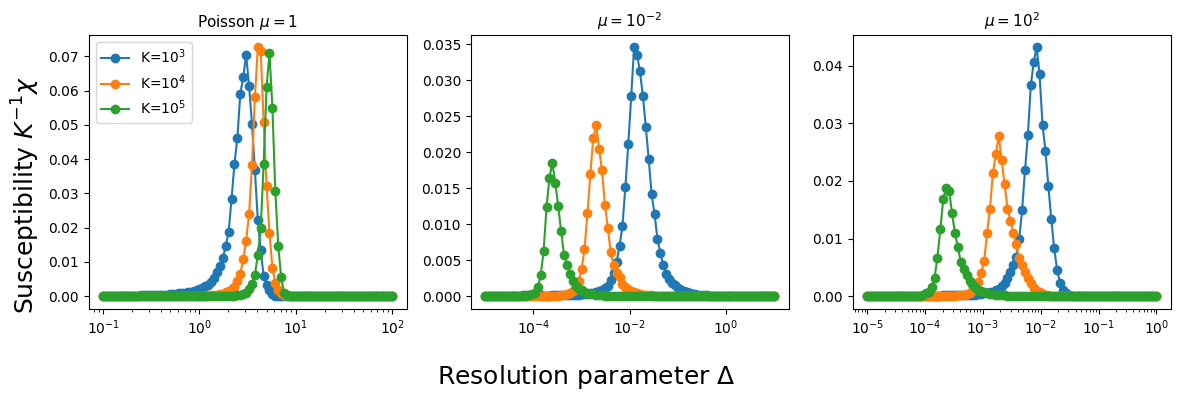

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_sus_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_sus_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_sus_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Susceptibility $K^{-1}\chi$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

## Stats stationary

In [3]:
muE = muI = 10**-2
nEE = 1.5   #0.96
nEI = 1.5     #0.24
nIE = -0.5    #-0.3
nII = 0. #0./10
K = 10**5
titles = ['Poisson $\mu=1$', '$\mu=10^{-2}$', '$\mu=10^2$']

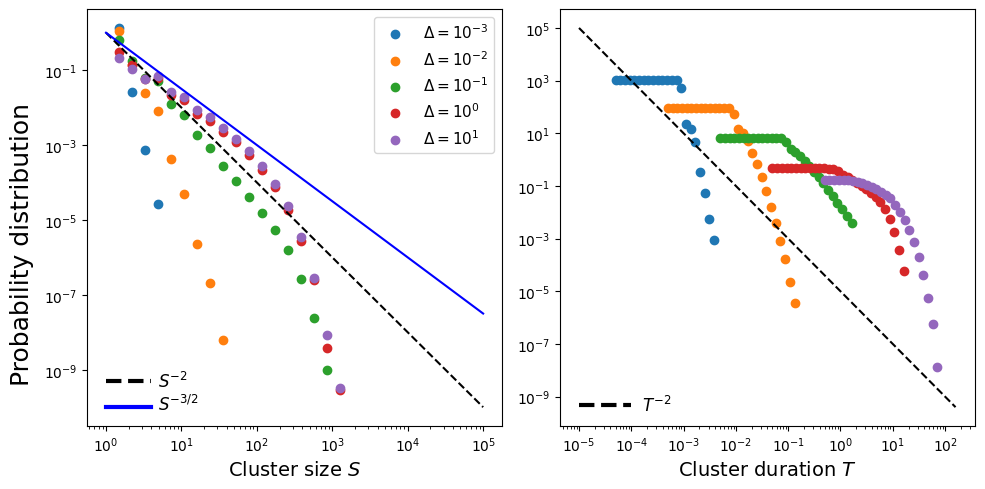

In [4]:
R = 10**3
K = 10**5
deltas = np.logspace(-3, 1, num = 5) 
s_bins = np.logspace(0, 5, num = 30, base = 10)
np.save(f'./data/Bivariate stationary sbins mu-2', s_bins)
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])
tbins = []

for delta in deltas:
    t_bins = np.logspace(np.log10(0.05*delta), np.log10(20*delta), num = 30, base = 10)
    tbins.append(t_bins)
    all_cluster_sizes = []
    all_cluster_times = []
    for _ in range(R):
        _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, 10**-2, 10**-2)
        _, cluster_sizes, cluster_times = identify_clusters(times, delta)
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)
    np.save(f'./data/Sizes bivariate stationary Delta = {delta} mu-2', all_cluster_sizes)
    np.save(f'./data/Times bivariate stationary Delta = {delta} mu-2', all_cluster_times)
    s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
    ax0.scatter(s_bins[:-1], s_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')
    t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
    ax1.scatter(t_bins[:-1], t_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')

# np.save(f'./data/Bivariate stationary tbins mu-2', tbins)

ax0.legend(fontsize = 11)

y_s = s_bins**(-2)
t_aux = np.logspace(-5, 2.2, num = 50)
y_t = t_aux**(-2)*10**-5
y_s2 = s_bins**(-3/2)

ax0.plot(s_bins, y_s, linestyle= '--', color = 'black', label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$', color = 'blue')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$', fontsize=14)

fig.supylabel('Probability distribution', fontsize=18)

ax1.plot(t_aux, y_t, label='$T^{-2}$', color = 'black', linestyle= '--')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$', fontsize=14)

fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.axes[1].annotate('$T^{-2}$', xy=(0.000085, 0.85E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[1].plot(np.logspace(-5, -4, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.tight_layout()

## Stats critical

In [5]:
muE = muI = 10**-2
nEE = 1.5   #0.96
nEI = 1.5     #0.24
nIE = -0.33    #-0.3
nII = 0. #0./10
K = 10**5

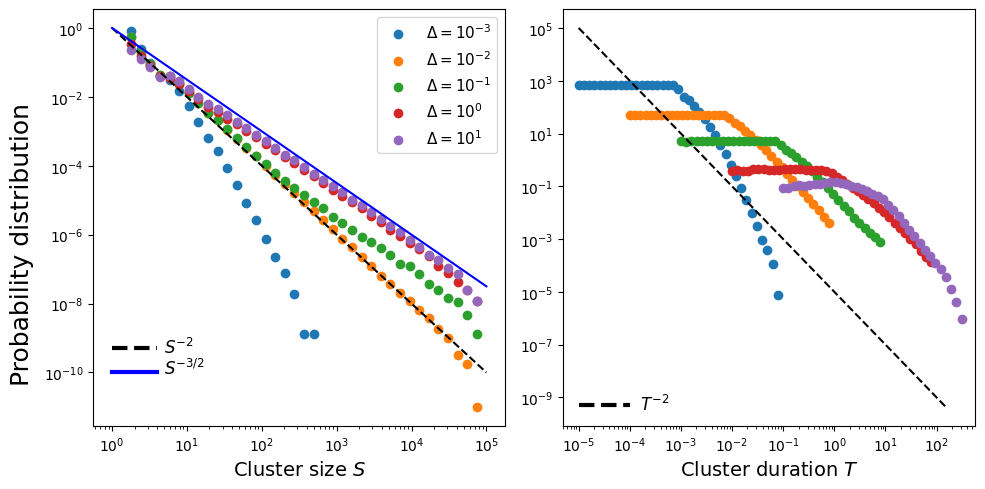

In [6]:
R = 10**3
K = 10**5
deltas = np.logspace(-3, 1, num = 5) 
s_bins = np.logspace(0, 5, num = 40, base = 10)
np.save(f'./data/Bivariate critical sbins mu-2', s_bins)
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])
tbins = []

for delta in deltas:
    t_bins = np.logspace(np.log10(0.01*delta), np.log10(100*delta), num = 40, base = 10)
    tbins.append(t_bins)
    all_cluster_sizes = []
    all_cluster_times = []
    for _ in range(R):
        _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, 10**-2, 10**-2)
        _, cluster_sizes, cluster_times = identify_clusters(times, delta)
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)
    np.save(f'./data/Sizes bivariate critical Delta = {delta} mu-2', all_cluster_sizes)
    np.save(f'./data/Times bivariate critical Delta = {delta} mu-2', all_cluster_times)
    s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
    ax0.scatter(s_bins[:-1], s_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')
    t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
    ax1.scatter(t_bins[:-1], t_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')

np.save(f'./data/Bivariate critical tbins mu-2', tbins)

ax0.legend(fontsize = 11)

y_s = s_bins**(-2)
t_aux = np.logspace(-5, 3, num = 50)
y_t = t_aux**(-2)*10**-5
y_s2 = s_bins**(-3/2)

ax0.plot(s_bins, y_s, linestyle= '--', color = 'black', label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$', color = 'blue')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$', fontsize=14)

fig.supylabel('Probability distribution', fontsize=18)

ax1.plot(t_aux[:45], y_t[:45], label='$T^{-2}$', color = 'black', linestyle= '--')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$', fontsize=14)

fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.axes[1].annotate('$T^{-2}$', xy=(0.000085, 1E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[1].plot(np.logspace(-5, -4, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)
fig.axes[1].set_xlim(5*10**-6, 10**2.75)

fig.tight_layout()

In [9]:
sbins = np.logspace(0, 5, 30)
tbins = np.load(f'./data/Bivariate critical tbins mu-2.npy')

In [10]:
deltas = np.logspace(-3, 1, 5)
sizes = [np.load(f'./data/Sizes bivariate critical Delta = {delta} mu-2.npy') for delta in deltas]
times = [np.load(f'./data/Times bivariate critical Delta = {delta} mu-2.npy') for delta in deltas]
shist = [np.histogram(s, density = True, bins = sbins)[0] for s in sizes]
thist = [np.histogram(t, density = True, bins = tbins[i])[0] for i, t in enumerate(times)]

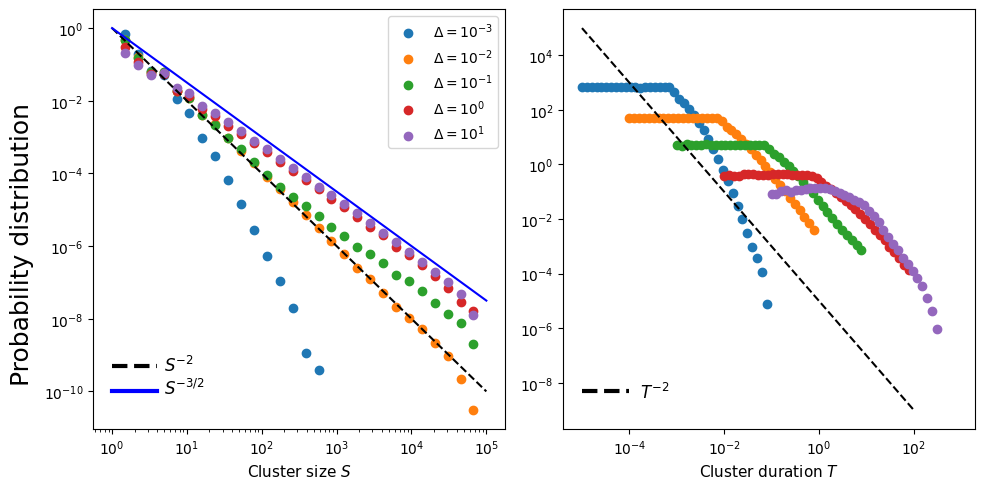

In [11]:
labels = [f'$\Delta = 10^{ {int(np.log10(delta))}}$' for delta in deltas]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(deltas)):
    axes[0].scatter(sbins[:-1], shist[i], marker = 'o', label = labels[i])
    axes[1].scatter(tbins[i][:-1], thist[i], marker = 'o', label = labels[i])

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[0].set_xlabel('Cluster size $S$', fontsize = 11)
axes[1].set_xlabel('Cluster duration $T$', fontsize = 11)
axes[0].legend()
fig.supylabel('Probability distribution', fontsize = 18)

y_s = sbins**-2
y_s2 = sbins**(-3/2)
t_aux = np.logspace(-5, 2, 20)
y_t = t_aux**-2 * 10**-5

axes[0].plot(sbins, y_s, linestyle = '--', color = 'black', label = '$S^{-2}$')
axes[0].plot(sbins, y_s2, color = 'blue', label = '$S^{-3/2}$')
axes[1].plot(t_aux, y_t, linestyle = '--', color = 'black', label = '$T^{-2}$')

fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.axes[1].annotate('$T^{-2}$', xy=(0.000085, 0.85E-9), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[1].plot(np.logspace(-5, -4, 10), np.ones(10)*5E-9, color='black', linestyle='--', lw = 3)


fig.tight_layout()